## TEORÍA DE PORTAFOLIOS CON DOS ACTIVOS RIESGOSOS

Los datos son anuales y se trabaja con estados de la naturaleza.

In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
escenarios=['Depresión', 'Recesión', 'Recuperación', 'Auge']
empresas=['A', 'B']
rets = pd.DataFrame([[-0.2, 0.05], [0.1, 0.20], [0.30, -0.12], [0.50, 0.09]], index=escenarios, columns=empresas)
rets

,A,B
Depresión,-0.2,0.05
Recesión,0.1,0.20
Recuperación,0.3,-0.12
Auge,0.5,0.09


In [3]:
sum_r=rets.sum()
sum_r

A    0.70
B    0.22
dtype: float64

In [4]:
promedio_r=rets.mean()
promedio_r

A    0.175
B    0.055
dtype: float64

In [5]:
varm_r=rets.var()
varm_r

A    0.089167
B    0.017633
dtype: float64

In [6]:
desvm_r=rets.std()
desvm_r

A    0.298608
B    0.132791
dtype: float64

In [7]:
varp_r=((rets-promedio_r)**2/len(rets)).sum()
varp_r

A    0.066875
B    0.013225
dtype: float64

In [8]:
desvp_r=varp_r**(1/2)
desvp_r

A    0.258602
B    0.115000
dtype: float64

In [9]:
rf=0.02
sr=(promedio_r-rf)/desvp_r
sr.round(3)

A    0.599
B    0.304
dtype: float64

In [10]:
cov_m=rets.cov()
cov_m

,A,B
A,0.089167,-0.006500
B,-0.006500,0.017633


### Pasos para calcular las covarianzas de población

In [11]:
cov_AA=(((rets['A']-rets['A'].mean())*((rets['A']-rets['A'].mean()))).sum())/len(rets)
cov_AB=(((rets['A']-rets['A'].mean())*((rets['B']-rets['B'].mean()))).sum())/len(rets)
cov_BB=(((rets['B']-rets['B'].mean())*((rets['B']-rets['B'].mean()))).sum())/len(rets)
cov_AA

0.066875

In [12]:
cov_AB

-0.004875

In [13]:
cov_BB

0.013224999999999999

In [14]:
cov_p = pd.DataFrame([[cov_AA, cov_AB], [cov_AB, cov_BB]], index=empresas, columns=empresas)
cov_p

,A,B
A,0.066875,-0.004875
B,-0.004875,0.013225


#### COMO DEFINIR UNA FUNCIÓN

In [15]:
def simple():
    print("My first function")

In [16]:
simple()

My first function


In [17]:
def plus_ten(a): # (a) se denomina parametro
    return a + 10 #este es el cuerpo de la función

In [18]:
plus_ten(2) #el dos se denomina argumento

12

In [19]:
def plus_ten(a):
    result=a+10
    return result

In [20]:
plus_ten(5)

15

In [21]:
def wage(w_hours):
    return w_hours * 25

def with_bonus(w_hours):
    return wage(w_hours) + 50

In [22]:
wage(8), with_bonus(8)

(200, 250)

### ELABORAMOS DOS FUNCIONES PARA CALCULAR EL RENDIMIENTO Y EL RIESGO DE UN PORTAFOLIO

In [23]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

In [24]:
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

## Calculamos el rendimiento y riesgo de nuestro portafolio con dos activos

In [25]:
ew = np.repeat(0.5, 2)
ew

array([0.5, 0.5])

In [26]:
rp_ew=portfolio_return(ew, promedio_r)
print(round(rp_ew*100,2))

11.5


In [27]:
n_points = 10
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.11111111, 0.88888889]),
 array([0.22222222, 0.77777778]),
 array([0.33333333, 0.66666667]),
 array([0.44444444, 0.55555556]),
 array([0.55555556, 0.44444444]),
 array([0.66666667, 0.33333333]),
 array([0.77777778, 0.22222222]),
 array([0.88888889, 0.11111111]),
 array([1., 0.])]

In [28]:
type(weights)

list

In [29]:
rp_dw = [portfolio_return(w, promedio_r) for w in weights]
rp_dw

[0.055,
 0.06833333333333333,
 0.08166666666666667,
 0.095,
 0.10833333333333332,
 0.12166666666666667,
 0.13499999999999998,
 0.1483333333333333,
 0.16166666666666665,
 0.175]

In [57]:
p_vol=[portfolio_vol(w, cov_p) for w in weights]
p_vol

[0.11499999999999999,
 0.10154820056031044,
 0.09806932544171287,
 0.10555409355712675,
 0.12200106253332083,
 0.14437925879561225,
 0.1703672503740082,
 0.19855263319369035,
 0.22812236807208278,
 0.258602010819715]

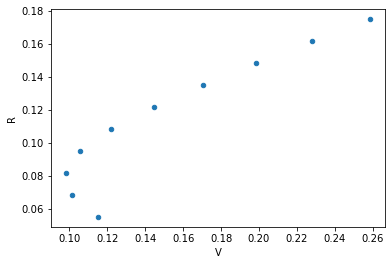

In [58]:
ef = pd.DataFrame({"R": rp_dw, "V": p_vol})
ef.plot.scatter(x="V", y="R")
plt.savefig("Frontera Eficiente.jpg")
plt.show()

In [59]:
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

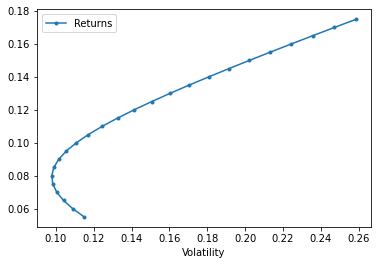

In [60]:
plot_ef2(25, promedio_r, cov_p)
plt.savefig("Frontera Eficiente2.jpg")

## CALCULAMOS EL RATIO DE SHARPE

In [61]:
ren_port=pd.DataFrame(rp_dw,)
ren_port

,0
0,0.055000
1,0.068333
2,0.081667
3,0.095000
4,0.108333
5,0.121667
6,0.135000
7,0.148333
8,0.161667
9,0.175000


In [62]:
rf=0.02
sr_p=(ren_port-rf)
sr_p.round(3)

,0
0,0.035
1,0.048
2,0.062
3,0.075
4,0.088
5,0.102
6,0.115
7,0.128
8,0.142
9,0.155


In [63]:
vol_port=pd.DataFrame(p_vol,)
vol_port

,0
0,0.115000
1,0.101548
2,0.098069
3,0.105554
4,0.122001
5,0.144379
6,0.170367
7,0.198553
8,0.228122
9,0.258602


In [64]:
sr_p=ren_port/vol_port
sr_p.round(3)

,0
0,0.478
1,0.673
2,0.833
3,0.900
4,0.888
5,0.843
6,0.792
7,0.747
8,0.709
9,0.677


## Graficamos un mapa de transición

Extraemos las ponderaciones de cada empresa en un data frame

In [65]:
p_w=pd.DataFrame(weights, columns=empresas)
p_w

,A,B
0,0.000000,1.000000
1,0.111111,0.888889
2,0.222222,0.777778
3,0.333333,0.666667
4,0.444444,0.555556
5,0.555556,0.444444
6,0.666667,0.333333
7,0.777778,0.222222
8,0.888889,0.111111
9,1.000000,0.000000


In [66]:
w_A=p_w['A']
w_B=p_w['B']

In [67]:
x_min=p_vol[0]
x_max=np.max(p_vol)

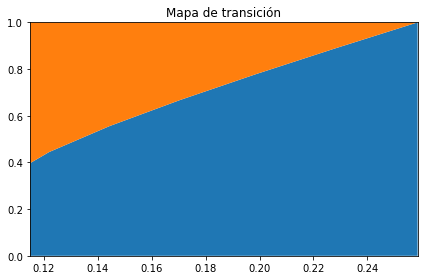

In [68]:
plt.stackplot(p_vol, w_A, w_B)
plt.title("Mapa de transición")
plt.xlim((x_min, x_max))
plt.ylim((0, 1))
plt.tight_layout()
plt.show()

## REPORTE FINAL

In [69]:
report=p_w.copy()
report['Rentabilidad']=rp_dw.copy()
report['Volatilidad']=p_vol.copy()
report['Sharpe Ratio']=sr_p.copy()
report

,A,B,Rentabilidad,Volatilidad,Sharpe Ratio
0,0.000000,1.000000,0.055000,0.115000,0.478261
1,0.111111,0.888889,0.068333,0.101548,0.672915
2,0.222222,0.777778,0.081667,0.098069,0.832744
3,0.333333,0.666667,0.095000,0.105554,0.900012
4,0.444444,0.555556,0.108333,0.122001,0.887970
5,0.555556,0.444444,0.121667,0.144379,0.842688
6,0.666667,0.333333,0.135000,0.170367,0.792406
7,0.777778,0.222222,0.148333,0.198553,0.747073
8,0.888889,0.111111,0.161667,0.228122,0.708684
9,1.000000,0.000000,0.175000,0.258602,0.676716


In [70]:
escenarios=['1', '2', '3','4','5','6','7','8','9','10']
report.index=escenarios
report

,A,B,Rentabilidad,Volatilidad,Sharpe Ratio
1,0.000000,1.000000,0.055000,0.115000,0.478261
2,0.111111,0.888889,0.068333,0.101548,0.672915
3,0.222222,0.777778,0.081667,0.098069,0.832744
4,0.333333,0.666667,0.095000,0.105554,0.900012
5,0.444444,0.555556,0.108333,0.122001,0.887970
6,0.555556,0.444444,0.121667,0.144379,0.842688
7,0.666667,0.333333,0.135000,0.170367,0.792406
8,0.777778,0.222222,0.148333,0.198553,0.747073
9,0.888889,0.111111,0.161667,0.228122,0.708684
10,1.000000,0.000000,0.175000,0.258602,0.676716


In [44]:
#report.columns=['X','Y','Z']
#report

In [71]:
report.to_excel('Portafolios_I.xlsx',sheet_name='Ponderaciones')

In [72]:
#para grabar en una hoja de excel
writer = pd.ExcelWriter('Portafolios_II.xlsx', engine='xlsxwriter')
report.to_excel(writer, sheet_name='Ponderaciones')
writer.save()

In [73]:
max_sr=report['Sharpe Ratio'].max()
max_sr

0.9000124656329431

In [48]:
report['Sharpe Ratio'].idxmax()

'4'

## CALCULAMOS EL PORTAFOLIO CON EL MAXIMO RATIO DE SHARPE

In [49]:
import avs_risk_kit as ark

In [76]:
ark.msr(0.02, promedio_r, cov_p).round(9)

array([0.41787488, 0.58212512])

In [77]:
max_sr_rts=(ark.msr(0.02, promedio_r, cov_p))*rets
max_sr_rts

,A,B
Depresión,-0.083575,0.029106
Recesión,0.041787,0.116425
Recuperación,0.125362,-0.069855
Auge,0.208937,0.052391


In [78]:
sum_return=max_sr_rts.sum(axis=1)
market_rts=pd.DataFrame(sum_return)
market_rts.columns=['UPB_Index']

In [79]:
market_rts

,UPB_Index
Depresión,-0.054469
Recesión,0.158213
Recuperación,0.055507
Auge,0.261329


## Covarianza con el portafolio de mercado y la constante para CAPM

In [80]:
r_total=rets.copy()
r_total['UPB_Index']=market_rts.copy()
cov_total=r_total.cov()
cov_total

,A,B,UPB_Index
A,0.089167,-0.006500,0.033477
B,-0.006500,0.017633,0.007549
UPB_Index,0.033477,0.007549,0.018383


In [81]:
cov_market=cov_total.iloc[2,:]
cov_market

A            0.033477
B            0.007549
UPB_Index    0.018383
Name: UPB_Index, dtype: float64

In [82]:
constante=(r_total.mean()-rf)/(cov_market)
constante

A            4.630086
B            4.636609
UPB_Index    4.631646
dtype: float64